# Applied Machine Learning | Object Detection Homework
Student: Evgenij Ivankin, e.ivankin@innopolis.university

## Dataset
I decided to stick to the theme of my current main project, and made a [dataset on Roboflow](https://universe.roboflow.com/aml-homework/handwritten-chemical-formulas) of handwritten chemical structural (2D) formulas.

In [1]:
!pip install -qqq roboflow

In [2]:
!pip install -qqq ultralytics==8.0.134

In [8]:
import os
from roboflow import Roboflow

ROBOFLOW_API_KEY = os.getenv("ROBOFLOW_API_KEY")  # Put your key here
rf = Roboflow(api_key=ROBOFLOW_API_KEY)
project = rf.workspace("aml-homework").project("handwritten-chemical-formulas")

loading Roboflow workspace...
loading Roboflow project...


## YOLOv8
Parts of code taken from [Roboflow tutorial](https://colab.research.google.com/github/roboflow-ai/notebooks/blob/main/notebooks/train-yolov8-object-detection-on-custom-dataset.ipynb)

In [9]:
dataset = project.version(1).download("yolov8")

Extracting Dataset Version Zip to Handwritten-Chemical-Formulas-1 in yolov8:: 100%|██████████| 518/518 [00:00<00:00, 1733.02it/s]


### Training

In [11]:
!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=25 imgsz=640 plots=True

100% 21.5M/21.5M [00:00<00:00, 50.0MB/s]
New https://pypi.org/project/ultralytics/8.0.140 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.134 🚀 Python-3.10.6 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/Handwritten-Chemical-Formulas-1/data.yaml, epochs=25, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None,

In [12]:
from IPython.display import Image

HOME = os.getcwd()

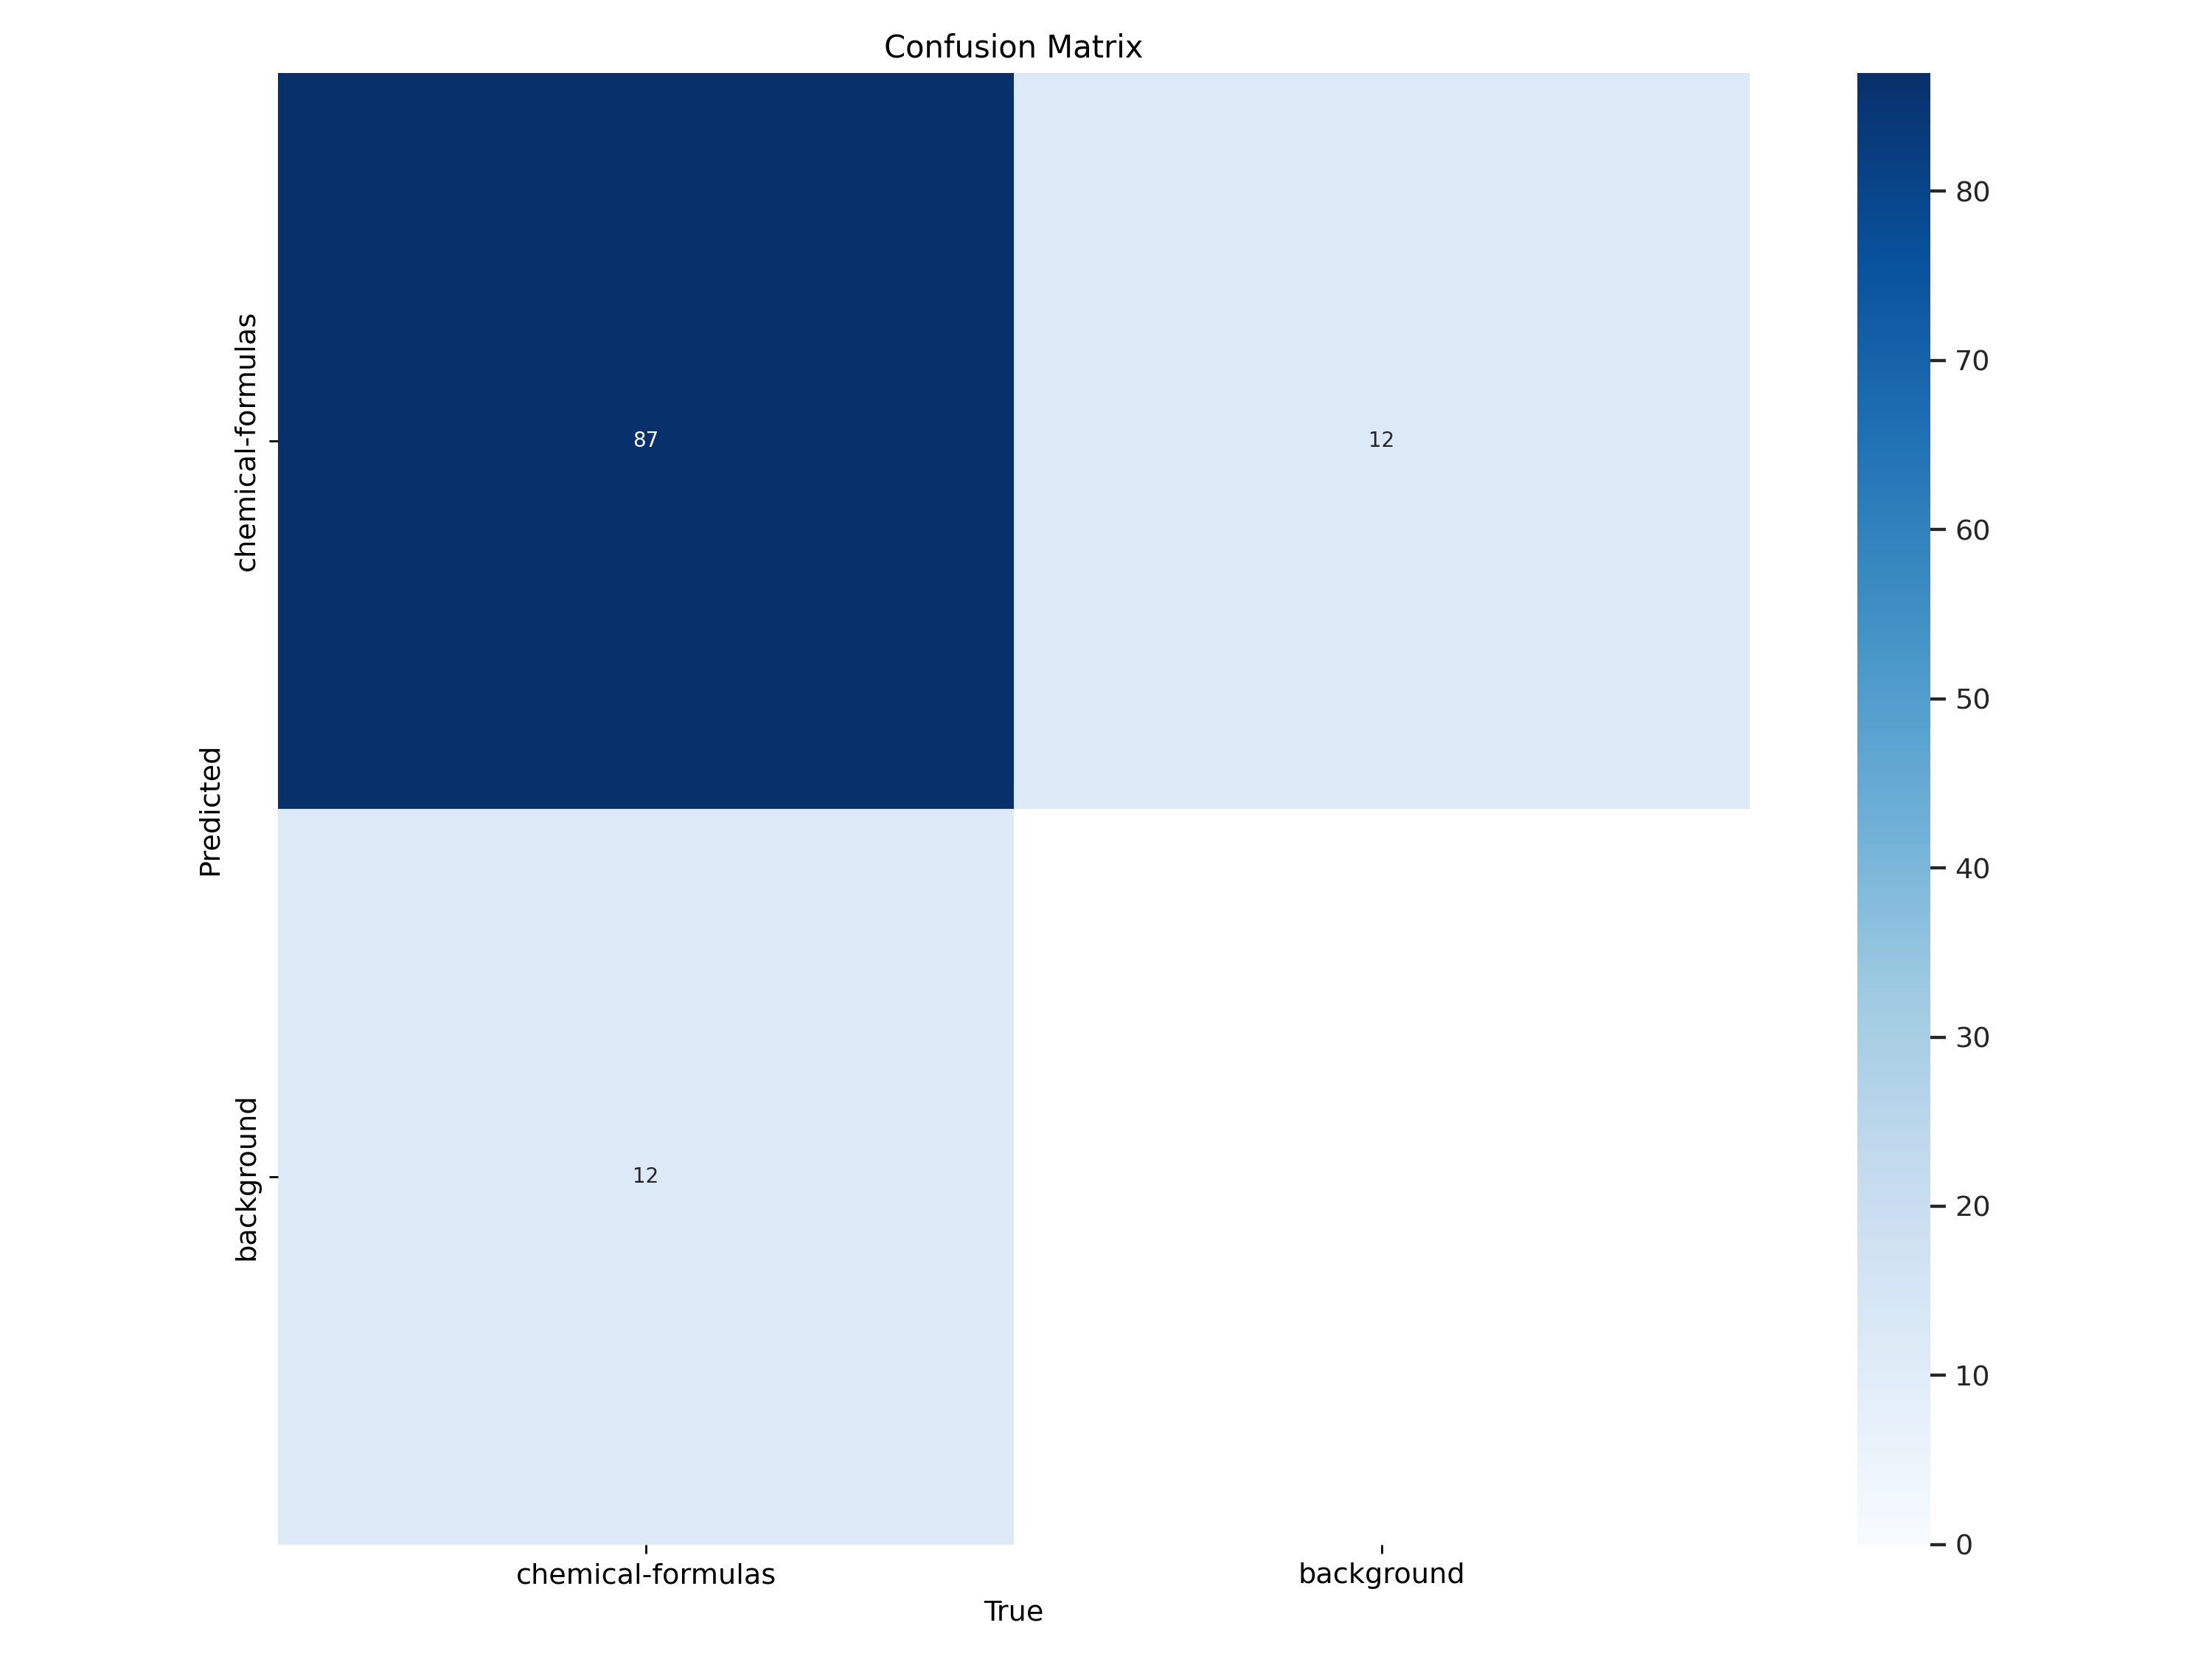

In [13]:
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

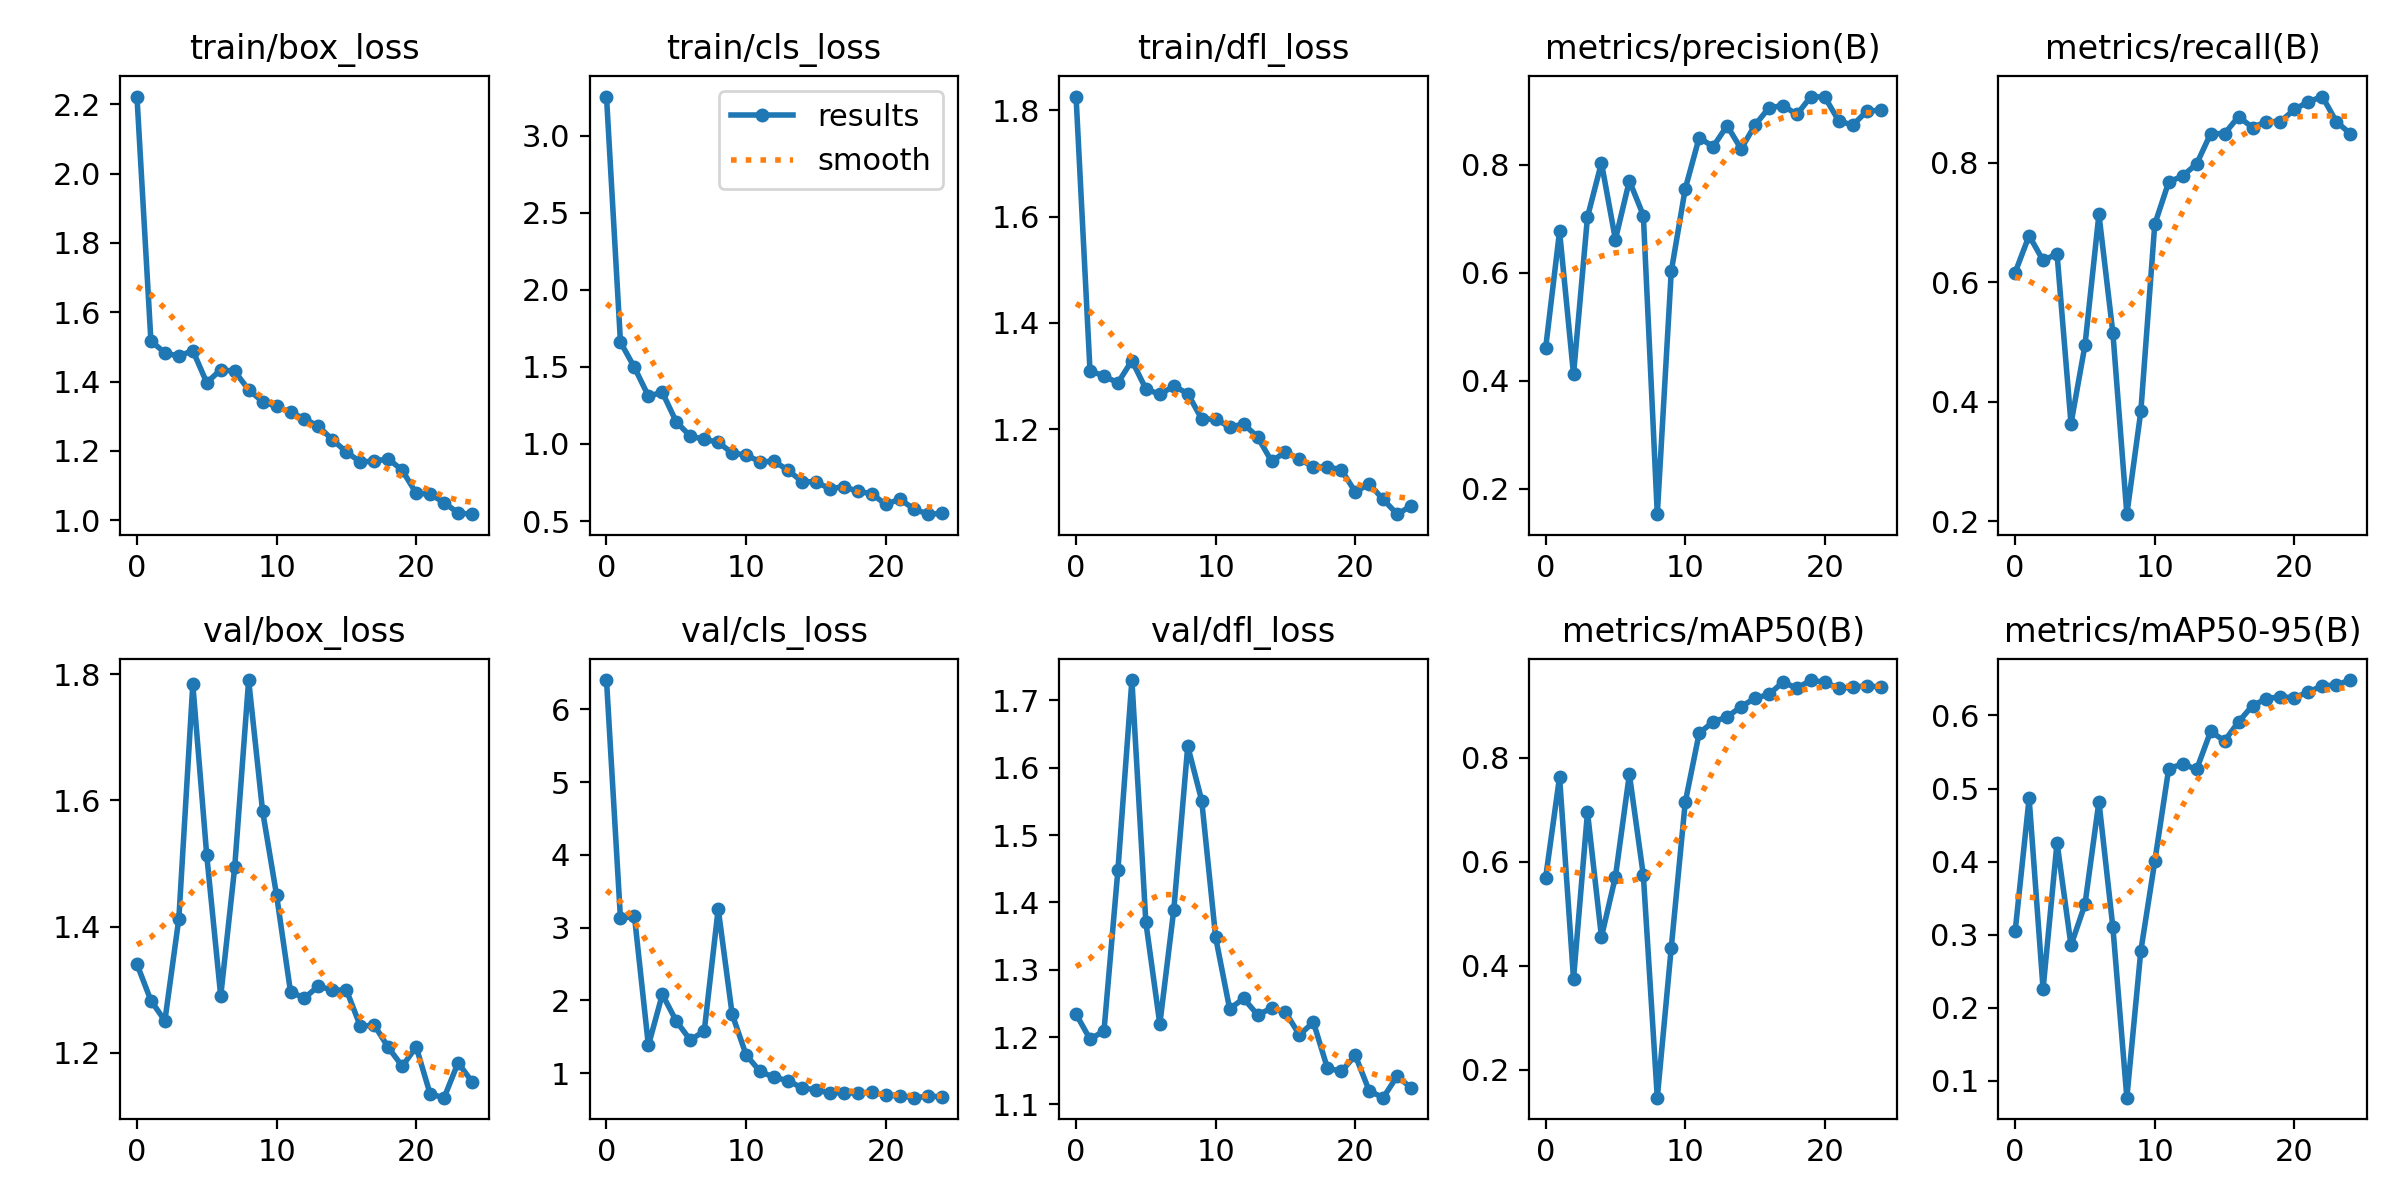

In [14]:
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

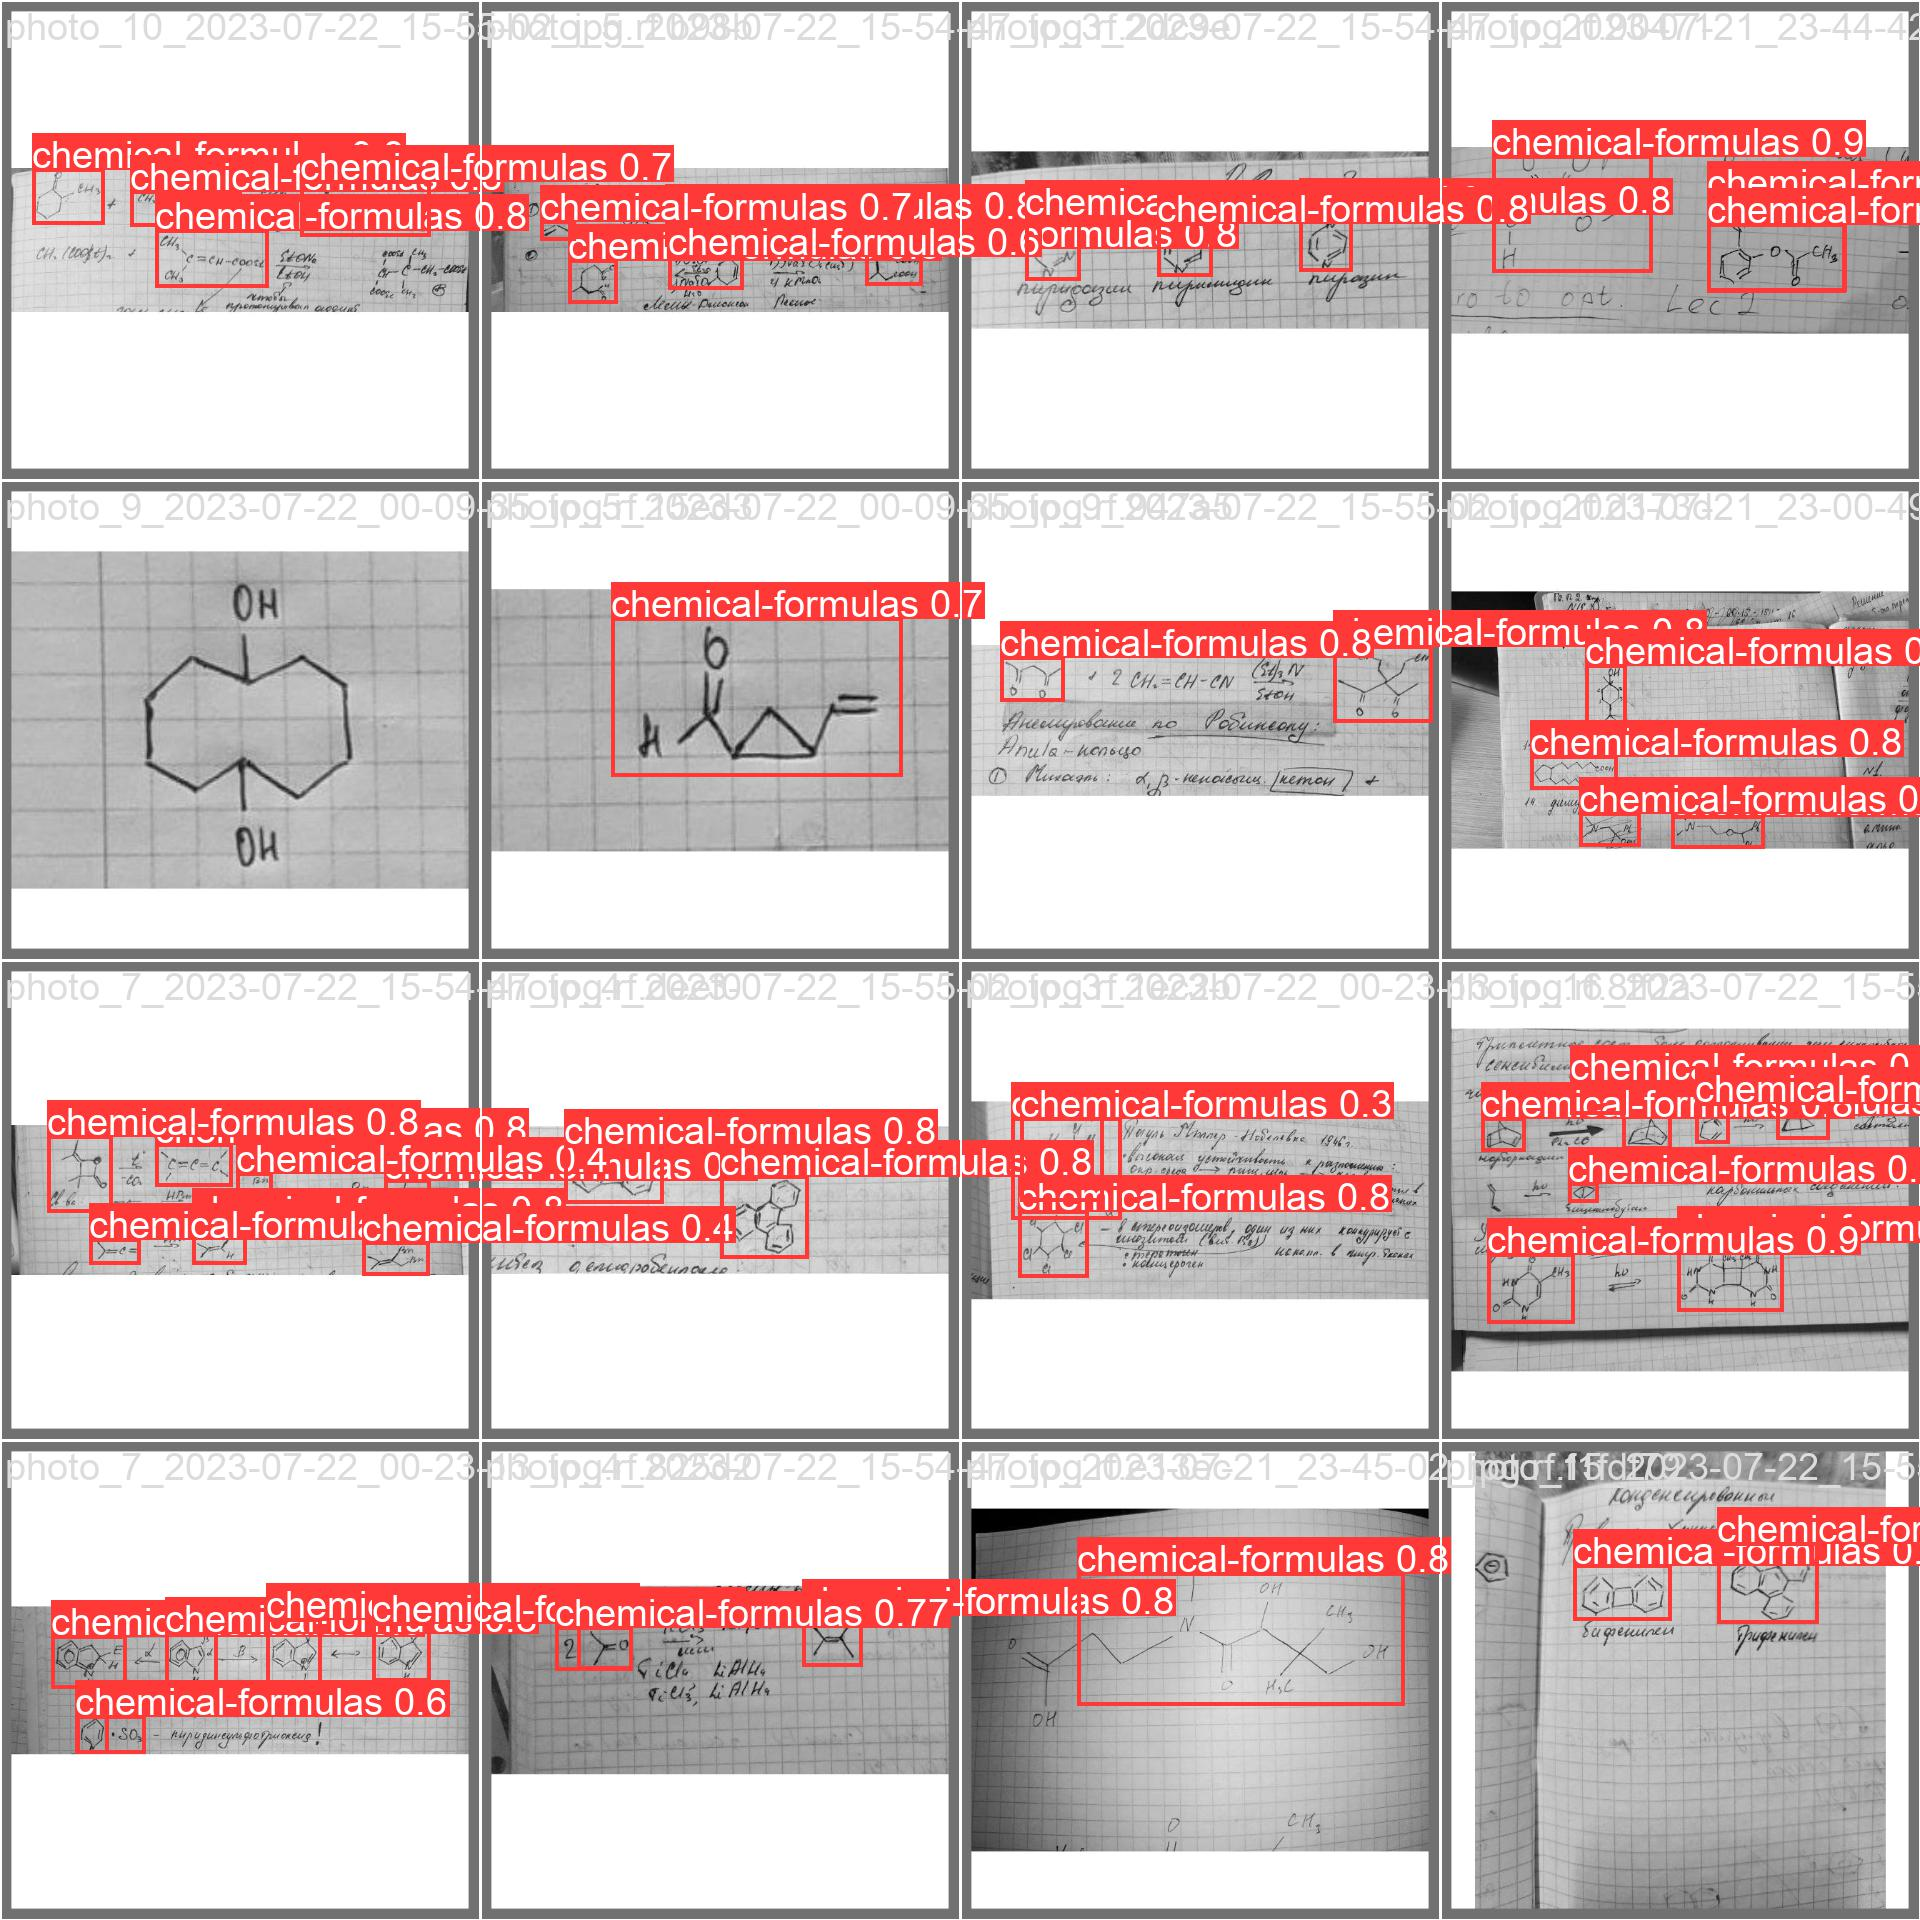

In [17]:
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

### Validation

In [19]:
!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

Ultralytics YOLOv8.0.134 🚀 Python-3.10.6 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients
val: Scanning /content/Handwritten-Chemical-Formulas-1/valid/labels.cache... 21 images, 0 backgrounds, 0 corrupt: 100% 21/21 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 2/2 [00:01<00:00,  1.72it/s]
                   all         21         99      0.903      0.848      0.936      0.651
Speed: 9.8ms preprocess, 28.9ms inference, 0.0ms loss, 1.4ms postprocess per image
Results saved to runs/detect/val


### Inference

In [20]:
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

Ultralytics YOLOv8.0.134 🚀 Python-3.10.6 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients

image 1/10 /content/Handwritten-Chemical-Formulas-1/test/images/photo_10_2023-07-22_00-09-35_jpg.rf.87a94a86253ab42765f40293dcc3fbd7.jpg: 640x640 1 chemical-formulas, 16.3ms
image 2/10 /content/Handwritten-Chemical-Formulas-1/test/images/photo_10_2023-07-22_15-55-15_jpg.rf.c0829050c4cfa2d87dd5ba3d90726f44.jpg: 640x640 4 chemical-formulass, 16.3ms
image 3/10 /content/Handwritten-Chemical-Formulas-1/test/images/photo_17_2023-07-22_15-55-44_jpg.rf.67b79d1da5c0b6ea2a70adcf9701987d.jpg: 640x640 12 chemical-formulass, 16.3ms
image 4/10 /content/Handwritten-Chemical-Formulas-1/test/images/photo_1_2023-07-22_15-55-02_jpg.rf.acae8a33730b3d330d1204c1fc5e2840.jpg: 640x640 7 chemical-formulass, 16.2ms
image 5/10 /content/Handwritten-Chemical-Formulas-1/test/images/photo_2023-07-21_23-44-37_jpg.rf.14a97d1a42ee44e64b555bc73a3d70e9.jpg: 640x640 2 

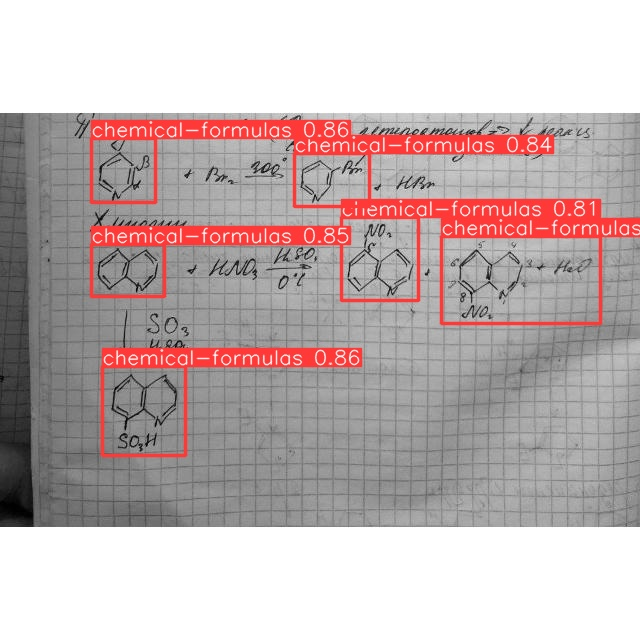

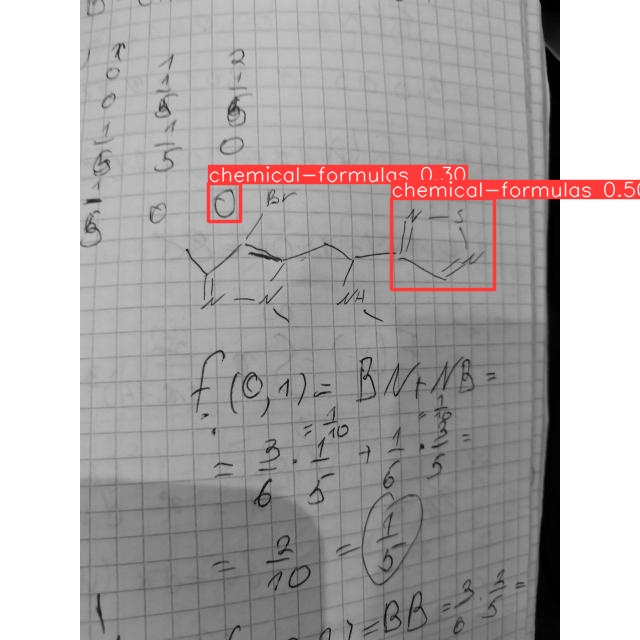

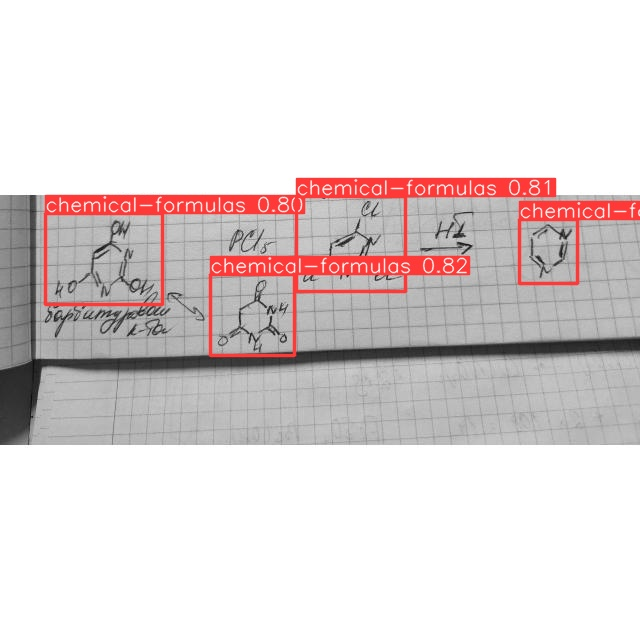

In [24]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[:3]:
    display(Image(filename=image_path, width=600))
    print("\n")

## Faster-RCNN
Parts of code taken from [Roboflow tutorial](https://colab.research.google.com/drive/1a0f-26CkR8tDg7wiOTt7KiOUnSpqNq_1)

In [9]:
dataset = project.version(1).download("coco")

Extracting Dataset Version Zip to Handwritten-Chemical-Formulas-1 in coco:: 100%|██████████| 261/261 [00:00<00:00, 1277.25it/s]


In [10]:
!python -m pip install -qqq 'git+https://github.com/facebookresearch/detectron2.git'

  Preparing metadata (setup.py) ... done


In [11]:
import torch, detectron2
!nvcc --version
TORCH_VERSION = ".".join(torch.__version__.split(".")[:2])
CUDA_VERSION = torch.__version__.split("+")[-1]
print("torch: ", TORCH_VERSION, "; cuda: ", CUDA_VERSION)
print("detectron2:", detectron2.__version__)

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2022 NVIDIA Corporation
Built on Wed_Sep_21_10:33:58_PDT_2022
Cuda compilation tools, release 11.8, V11.8.89
Build cuda_11.8.r11.8/compiler.31833905_0
torch:  2.0 ; cuda:  cu118
detectron2: 0.6


In [12]:
# COMMON LIBRARIES
import os
import cv2

from datetime import datetime
from google.colab.patches import cv2_imshow

# DATA SET PREPARATION AND LOADING
from detectron2.data.datasets import register_coco_instances
from detectron2.data import DatasetCatalog, MetadataCatalog

# VISUALIZATION
from detectron2.utils.visualizer import Visualizer
from detectron2.utils.visualizer import ColorMode

# CONFIGURATION
from detectron2 import model_zoo
from detectron2.config import get_cfg

# EVALUATION
from detectron2.engine import DefaultPredictor

# TRAINING
from detectron2.engine import DefaultTrainer

In [13]:
DATA_SET_NAME = dataset.name.replace(" ", "-")
ANNOTATIONS_FILE_NAME = "_annotations.coco.json"

In [14]:
# TRAIN SET
TRAIN_DATA_SET_NAME = f"{DATA_SET_NAME}-train"
TRAIN_DATA_SET_IMAGES_DIR_PATH = os.path.join(dataset.location, "train")
TRAIN_DATA_SET_ANN_FILE_PATH = os.path.join(dataset.location, "train", ANNOTATIONS_FILE_NAME)

register_coco_instances(
    name=TRAIN_DATA_SET_NAME,
    metadata={},
    json_file=TRAIN_DATA_SET_ANN_FILE_PATH,
    image_root=TRAIN_DATA_SET_IMAGES_DIR_PATH
)

# TEST SET
TEST_DATA_SET_NAME = f"{DATA_SET_NAME}-test"
TEST_DATA_SET_IMAGES_DIR_PATH = os.path.join(dataset.location, "test")
TEST_DATA_SET_ANN_FILE_PATH = os.path.join(dataset.location, "test", ANNOTATIONS_FILE_NAME)

register_coco_instances(
    name=TEST_DATA_SET_NAME,
    metadata={},
    json_file=TEST_DATA_SET_ANN_FILE_PATH,
    image_root=TEST_DATA_SET_IMAGES_DIR_PATH
)

# VALID SET
VALID_DATA_SET_NAME = f"{DATA_SET_NAME}-valid"
VALID_DATA_SET_IMAGES_DIR_PATH = os.path.join(dataset.location, "valid")
VALID_DATA_SET_ANN_FILE_PATH = os.path.join(dataset.location, "valid", ANNOTATIONS_FILE_NAME)

register_coco_instances(
    name=VALID_DATA_SET_NAME,
    metadata={},
    json_file=VALID_DATA_SET_ANN_FILE_PATH,
    image_root=VALID_DATA_SET_IMAGES_DIR_PATH
)

In [15]:
[
    data_set
    for data_set
    in MetadataCatalog.list()
    if data_set.startswith(DATA_SET_NAME)
]

['Handwritten-Chemical-Formulas-train',
 'Handwritten-Chemical-Formulas-test',
 'Handwritten-Chemical-Formulas-valid']

Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.



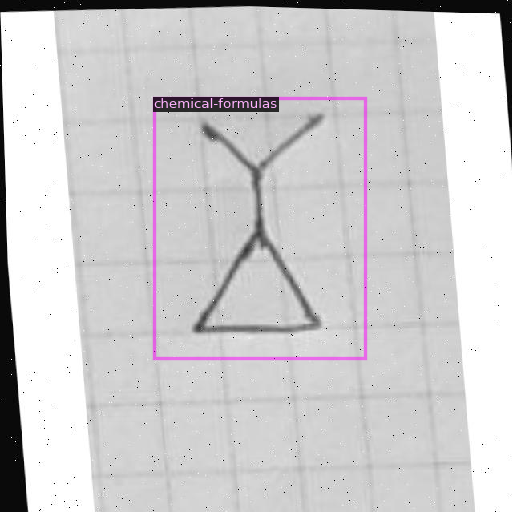

In [16]:
metadata = MetadataCatalog.get(TRAIN_DATA_SET_NAME)
dataset_train = DatasetCatalog.get(TRAIN_DATA_SET_NAME)

dataset_entry = dataset_train[0]
image = cv2.imread(dataset_entry["file_name"])

visualizer = Visualizer(
    image[:, :, ::-1],
    metadata=metadata,
    scale=0.8,
    instance_mode=ColorMode.IMAGE_BW
)

out = visualizer.draw_dataset_dict(dataset_entry)
cv2_imshow(out.get_image()[:, :, ::-1])

In [27]:
# HYPERPARAMETERS
ARCHITECTURE = "faster_rcnn_R_50_FPN_3x"
CONFIG_FILE_PATH = f"COCO-Detection/{ARCHITECTURE}.yaml"
TOTAL_NUM_IMAGES = 222  # For training
EPOCHS = 25
BATCH_SIZE = 8
MAX_ITER = int(EPOCHS * TOTAL_NUM_IMAGES / BATCH_SIZE) + 1
EVAL_PERIOD = int(TOTAL_NUM_IMAGES / BATCH_SIZE) + 1  # Every epoch
BASE_LR = 0.001
NUM_CLASSES = 2  # len(['chemical-formulas']) + 1

# OUTPUT DIR
OUTPUT_DIR_PATH = os.path.join(
    DATA_SET_NAME,
    ARCHITECTURE,
    datetime.now().strftime('%Y-%m-%d-%H-%M-%S')
)

os.makedirs(OUTPUT_DIR_PATH, exist_ok=True)

In [28]:
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file(CONFIG_FILE_PATH))
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url(CONFIG_FILE_PATH)
cfg.DATASETS.TRAIN = (TRAIN_DATA_SET_NAME,)
cfg.DATASETS.TEST = (VALID_DATA_SET_NAME,)
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 64
cfg.TEST.EVAL_PERIOD = EVAL_PERIOD
cfg.DATALOADER.NUM_WORKERS = 2
cfg.SOLVER.IMS_PER_BATCH = BATCH_SIZE
cfg.SOLVER.BASE_LR = BASE_LR
cfg.SOLVER.MAX_ITER = MAX_ITER
cfg.MODEL.ROI_HEADS.NUM_CLASSES = NUM_CLASSES
cfg.OUTPUT_DIR = OUTPUT_DIR_PATH

### Training

In [ ]:
!wget https://raw.githubusercontent.com/facebookresearch/detectron2/main/tools/train_net.py

In [20]:
from train_net import Trainer

In [29]:
trainer = Trainer(cfg)
trainer.resume_or_load(resume=False)
trainer.train()

[07/23 08:45:04 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}


[07/23 08:45:05 d2.engine.train_loop]: Starting training from iteration 0
[07/23 08:45:33 d2.utils.events]:  eta: 0:15:32  iter: 19  total_loss: 2.029  loss_cls: 0.9918  loss_box_reg: 0.5649  loss_rpn_cls: 0.4309  loss_rpn_loc: 0.04247    time: 1.3974  last_time: 1.3847  data_time: 0.1574  last_data_time: 0.1216   lr: 2.835e-05  max_mem: 7601M
WARNING [07/23 08:45:45 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[07/23 08:45:45 d2.data.datasets.coco]: Loaded 21 images in COCO format from /content/Handwritten-Chemical-Formulas-1/valid/_annotations.coco.json
[07/23 08:45:45 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[07/23 08:45:45 d2.data.common]: Serializing the dataset using: <class 'detectron2.data.common._TorchSerializedList'>
[07/23 08:45:45 d2.data.common]: Serializing 21 elements to byte tensors

### Evaluation

In [30]:
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5
trainer = Trainer(cfg)
trainer.resume_or_load(resume=True)

[07/23 09:02:08 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

In [31]:
from detectron2.evaluation import COCOEvaluator, inference_on_dataset
from detectron2.data import build_detection_test_loader
evaluator = COCOEvaluator(TEST_DATA_SET_NAME, cfg, False, output_dir=cfg.OUTPUT_DIR)
val_loader = build_detection_test_loader(cfg, TEST_DATA_SET_NAME)
inference_on_dataset(trainer.model, val_loader, evaluator)

WARNING [07/23 09:02:09 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.
WARNING [07/23 09:02:09 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[07/23 09:02:09 d2.data.datasets.coco]: Loaded 10 images in COCO format from /content/Handwritten-Chemical-Formulas-1/test/_annotations.coco.json
[07/23 09:02:09 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[07/23 09:02:09 d2.data.common]: Serializing the dataset using: <class 'detectron2.data.common._TorchSerializedList'>
[07/23 09:02:09 d2.data.common]: Serializing 10 elements to byte tensors and concatenating them all ...
[07/23 09:02:09 d2.data.common]: Serialized dataset takes 0.00 MiB
[07/23 09:02:09 d2.evaluation.evaluator]: Start inference on 10 batches
[07/23

OrderedDict([('bbox',
              {'AP': 47.201354234341295,
               'AP50': 81.92759125536615,
               'AP75': 58.10641735081548,
               'APs': nan,
               'APm': 50.31512494340331,
               'APl': 44.729226219325234,
               'AP-chemical-formulas': 47.201354234341295})])

In [32]:
predictor = DefaultPredictor(cfg)

[07/23 09:02:10 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from Handwritten-Chemical-Formulas/faster_rcnn_R_50_FPN_3x/2023-07-23-08-44-55/model_final.pth ...


WARNING [07/23 09:02:11 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[07/23 09:02:11 d2.data.datasets.coco]: Loaded 10 images in COCO format from /content/Handwritten-Chemical-Formulas-1/test/_annotations.coco.json


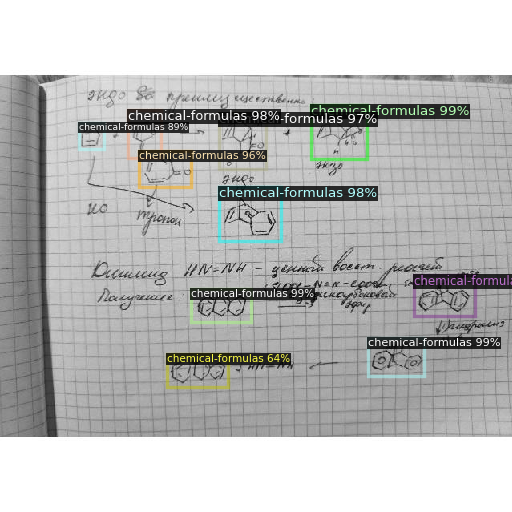

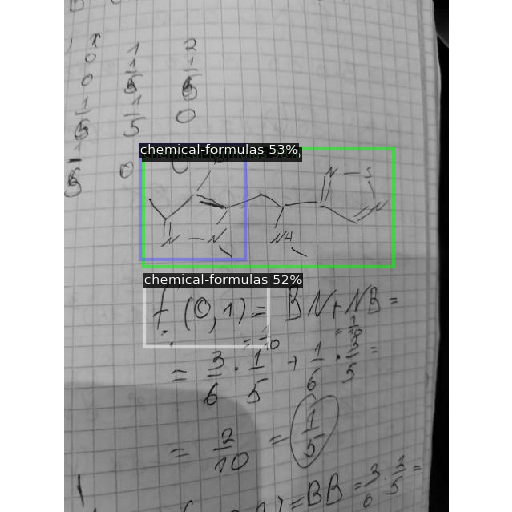

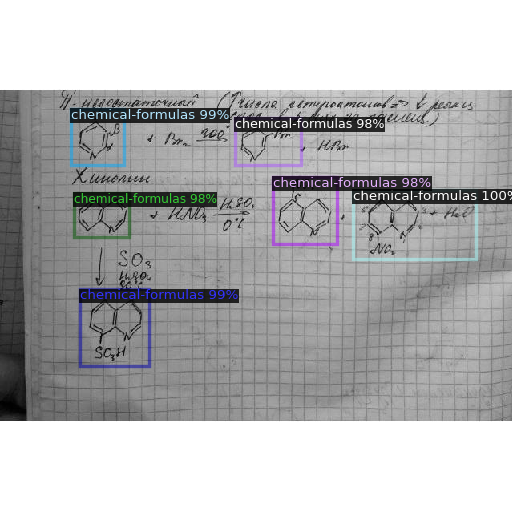

In [33]:
dataset_test = DatasetCatalog.get(TEST_DATA_SET_NAME)

for d in dataset_test[:3]:
    img = cv2.imread(d["file_name"])
    outputs = predictor(img)

    visualizer = Visualizer(
        img[:, :, ::-1],
        metadata=metadata,
        scale=0.8,
        instance_mode=ColorMode.IMAGE_BW
    )
    out = visualizer.draw_instance_predictions(outputs["instances"].to("cpu"))
    cv2_imshow(out.get_image()[:, :, ::-1])

## Comparison
### Speed
Training Faster-RCNN took roughly 5 times longer than YOLOv8 (16 minutes vs 3 minutes) for the same number of epochs (25).
Inference of Faster-RCNN took roughly 16 times longer than YOLOv8 (80 ms vs 5 ms).

### Metrics
YOLOv8 achieved 93 mAP50 while Faster-RCNN achieved 85 mAP50 on validation dataset. But YOLOv8 is much smaller model and learns faster, so more experiments with bigger number of epochs for Faster-RCNN is required.

### Size
Faster-RCNN weights roughly 7 times more than YOLOv8 (160 MB vs 21.5 MB).

### Conclusion
YOLOv8 performed better in this experimental setup with the same number of epochs for both models.